三角函数，考虑一下向量v1= [1, 2, 3]，v1和向量 v2=0.5×v1 之间的角度将会是0，参见下面的代码片段：

In [1]:
import numpy as np

In [2]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

### 加载鸢尾花数据集
通过在线资源加载：

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml'
                 '/machine-learning-databases/iris/iris.data',
                 header=None, encoding='utf-8')

In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


从本地直接加载：

In [6]:
df = pd.read_csv('iris.data', header=None, encoding='utf-8')

In [7]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


从鸢尾花数据集中取出100个训练样本中提取特征的第一列（萼片长度）和第三列（花瓣长度），并将它们存入特征矩阵X，然后经过可视化处理形成二维散点图：

In [8]:
import matplotlib.pyplot as plt

In [9]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [10]:
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

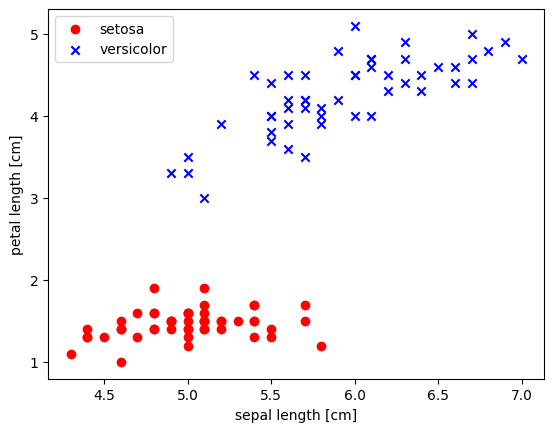

In [11]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

用python实现感知分类器：

In [12]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of
          examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.erros_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.erros_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) > 0.0, 1, -1)

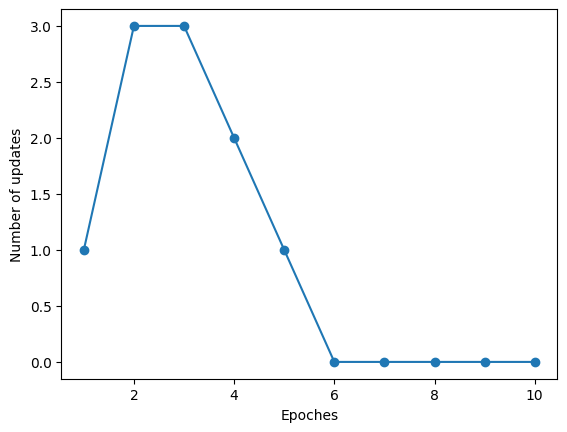

In [13]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.erros_) + 1), ppn.erros_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of updates')
plt.show()

正如上图显示的那样，感知器在第六次迭代后开始收敛，现在我们应该能够完美地对训练样本进行分类了。下面通过实现一个短小精干的函数来完成二维数据集决策边界的可视化：

In [14]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

首先，我们通过ListedColormap根据颜色列表来定义一些颜色和标记并创建色度图。然后，确定两个特征的最小值和最大值，通过调用NumPy的meshgrid函数，利用特征向量来创建网格数组对xx1和xx2。因为是在两个特征维度上训练感知器分类器，所以我们需要对网格数组进行扁平化，以创建一个与鸢尾花训练数据子集相同列数的矩阵，这样就可以调用predict方法来预测相应网格点的分类标签z。

在把预测获得的分类标签z改造成与xx1和xx2相同维数的网格后，现在可以通过调用Matplotlib的contourf函数画出轮廓图，把网格数组中的每个预测分类结果标注在不同颜色的决策区域。执行下面的代码后，我们可以看到对应的决策区域：

C:\Users\LangLang\AppData\Local\Temp\ipykernel_15900\1841755284.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


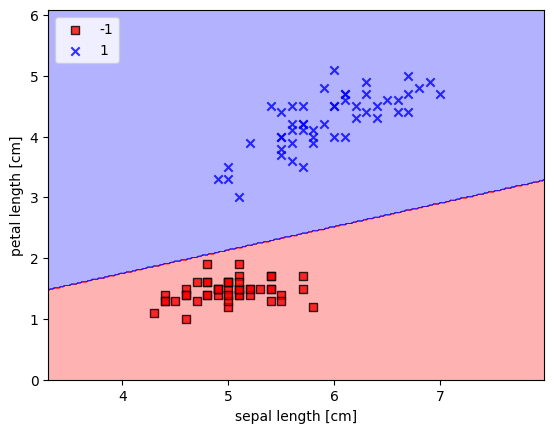

In [15]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## 用Python实现Adaline
因为感知器的算法规则与Adaline非常相近，这里将在前面的感知器实现的基础上修改fit方法，通过梯度下降最小化代价函数来更新权重。

In [16]:
class AdalineGD(object):
    """Adaptive Linear Neuron classifier
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the traing dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : ld-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples
            is the nubmer of examples and
            n_features is the nubmer of features.
        y : array-like, shape = [n_examples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Returen class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

不像感知器那样在每次训练模型后都更新权重，我们根据整个训练数据集来计算梯度，调用`self.eta * errors.sum()`计算偏置单元（零权重），调用`self.eta *X.T.dot(errors)`计算从1到m的权重，这里`X.T.dot(errors)`是特征矩阵与误差向量的矩阵相乘。

请注意，`activation`方法对代码没有影响，因为它只是一个标识函数。在这里，我们添加激活函数（通过`activation`方法来计算）来说明信息是如何通过单层神经网络流动的：从输入数据、净输入、激活到输出。

与感知器类似，我们把所收集的代价存储在`self.cost_`列表，以检验训练后的算法是否收敛。

在实践中，我们经常需要通过实验找到可以达到最优收敛的最佳学习速率$η$。所以选择$η=0.1$和$η=0.0001$两个不同的学习速率，把代价函数与迭代次数的关系在图中画出，以便观察Adaline实现从训练数据中学习的情况。
下面的代码将根据两种不同的学习速率，画出代价与迭代次数之间的关系图：

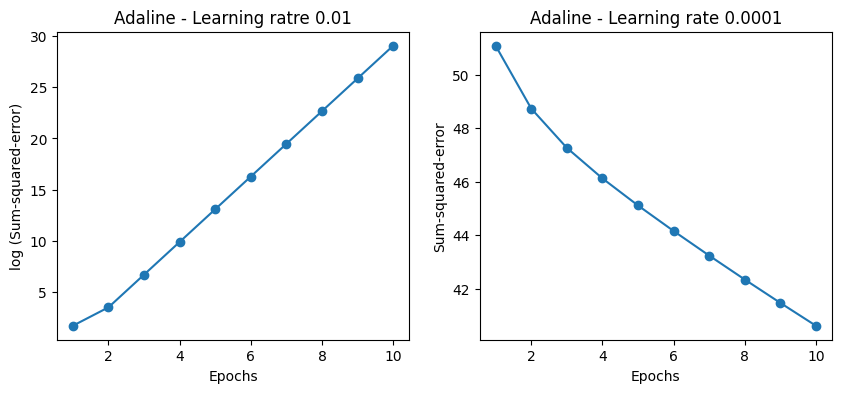

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log (Sum-squared-error)')
ax[0].set_title('Adaline - Learning ratre 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

从图中绘制的代价函数图可以看到，存在着两种不同类型的问题。左图显示选择学习速率太大将会出现的情况。因为所选的全局最小值太低，以至于代价函数无法最小化，结果误差经过每次迭代变得越来越大。另一方面，从右图可以看到代价在降低，但所选的学习速率η=0.0001太小，以至于算法需要经过多次迭代才能收敛到全局最低代价。

### 通过特征缩放改善梯度下降

梯度下降是从特征缩放受益的众多算法之一。本节将用一种称为**标准化**的特征缩放方法，它可以使数据具有标准正态分布的特性：零均值和单位方差。此标准化过程有助于促进梯度下降学习更快地收敛。但它不会使原始数据集呈正态分布。标准化会使每个特征的均值以零为中心，并且每个特征的标准差为1（单位方差）。例如，对第$j$个特征的标准化，我们可以简单地用每个训练样本值减去均值$μ_j$，然后再除以标准差$σ_j$：

$$
x_j^{'} = \frac{x_j-\mu_j}{\sigma_j}
$$

这里$x_j$是包含所有$n$个训练样本的第$j$个特征值的向量，该标准化技术将应用于数据集的每个特征$j$。

优化器必须遍历几个步骤才能发现好的或者最优解（全局代价最小），这是标准化有助于梯度下降学习的原因之一，如下图所示，两个子图将代价平面表示为二元分类问题中两个模型权重的函数。

In [18]:
from IPython.display import Image

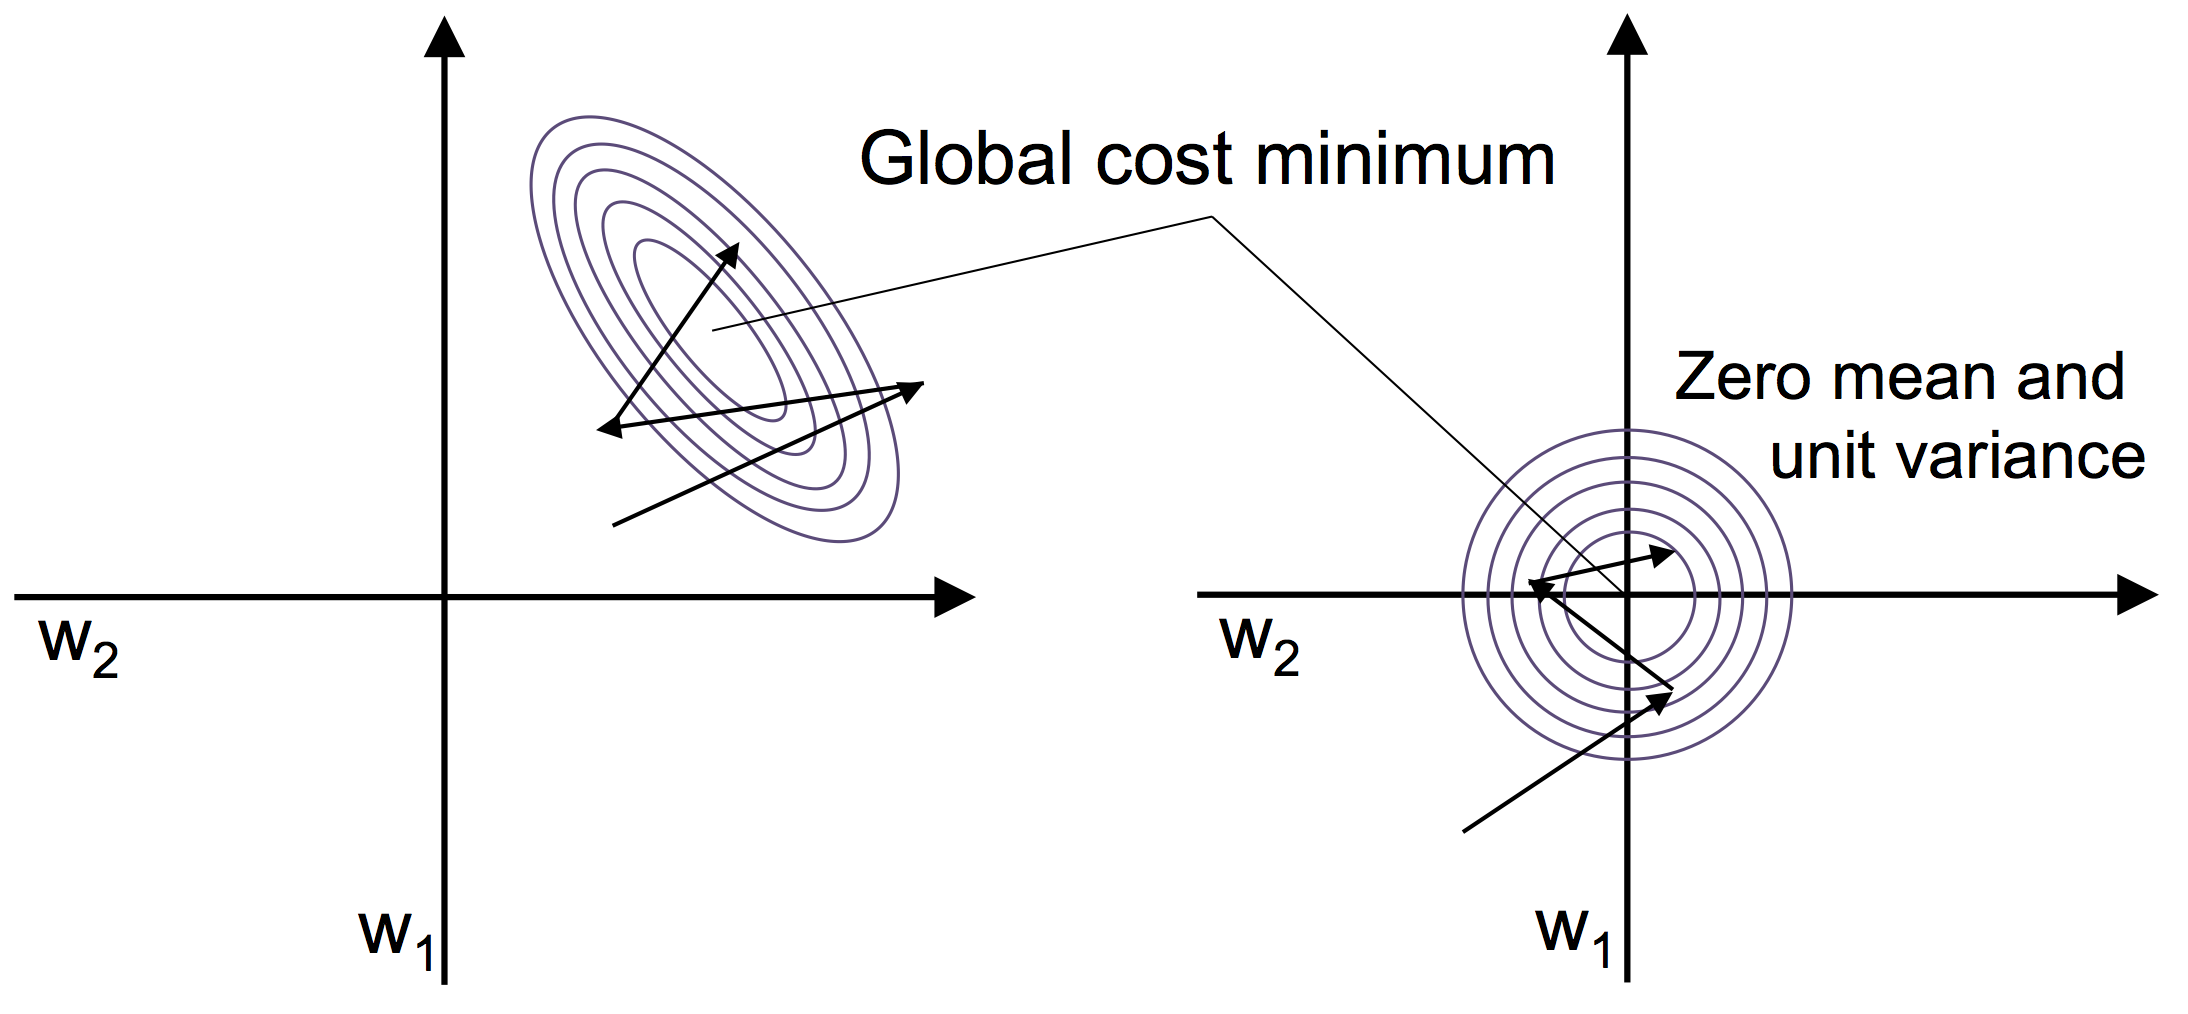

In [19]:
Image(filename='images/02_13.png', width=300)

用NumPy内置的`mean`和`std`方法可以很容易地实现标准化：

In [20]:
X_std = np.copy(X)
X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X_std[:, 1].std()

标准化完成之后，将再次训练Adaline，然后在学习速率η=0.01的条件下，可以看到它经过几轮迭代后完成了收敛：

C:\Users\LangLang\AppData\Local\Temp\ipykernel_15900\1841755284.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


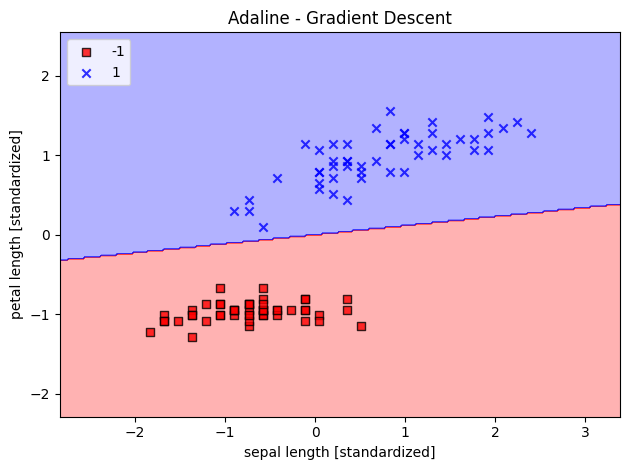

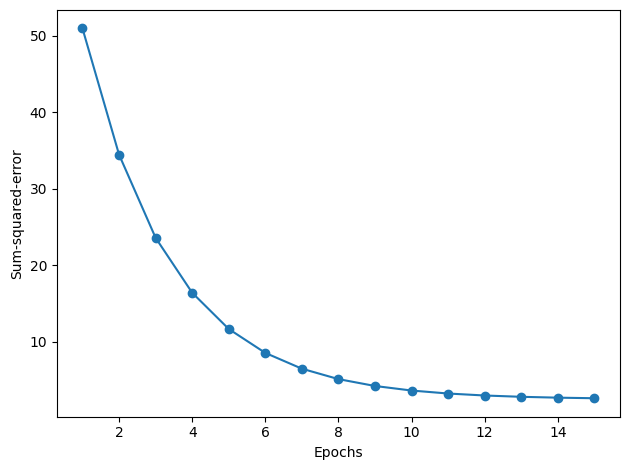

In [22]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

从图中可以看到，在学习速率η=0.01的情况下，Adaline经过训练已经开始收敛。然而，即使所有的样本都分类正确了，SSE仍然保持非零。

### 大规模机器学习与随机梯度下降

在上一节中，我们学习了如何基于整个训练数据集来计算代价梯度，从相反方向来最小化代价函数，这就是为什么这种方法有时也称为**批量梯度下降**。假设现在有一个拥有数百万个数据点的非常大的数据集，这在许多机器学习应用中并不少见。在这种情况下，运行批量梯度下降的计算成本巨大，因为向全局最小值的方向每迈出一步，都需要重新评估整个训练数据集。

**随机梯度下降**（**Stochastic Gradient Descent, SGD**）算法是批量梯度下降算法的一种常用替代方法，它有时也称为迭代或在线梯度下降法。该方法并不是基于所有样本$x^{(i)}$的累积误差之和来更新权重：

$$
\Delta{w} = \eta \mathop{\Sigma}\limits_{i}(y^{(i)}-\phi(z^{(i)}))x^{(i)}
$$

而是逐渐更新每个训练样本的权重：

$$
\eta(y^{(i)}-\phi(z^{(i)}))x^{(i)}
$$

虽然随机梯度下降可以看作梯度下降的近似，但因为需要更频繁地更新权重，所以通常收敛得更快。因为要根据单个训练实例来计算每个梯度，所以误差平面比梯度下降噪声更大，当然这也有优势，因为如果采用非线性代价函数，随机梯度下降更容易逃脱浅度局部极小值。要通过随机梯度下降获得满意的结果，很重要的一点是将训练数据以随机顺序呈现出来，同时要对训练数据集重新洗牌以防止迭代循环。

#### 在训练中调整学习速率

在随机梯度下降的实现中，固定的学习速率$η$经常被随时间下降的自适应学习速率所取代，例如：

$$
\frac{C_1}{[number of iterations] + C_2}
$$

其中$C_1$和$C_2$为常数，要注意随机梯度下降并没有到达全局最小值，而是在一个非常靠近这个点的区域。用自适应学习速率可以把代价进一步最小化。

**随机梯度下降的另外一个优点**是它可以用于在线学习。在线学习中模型可以在数据到达时实时完成训练。这对累积大量数据的情况特别有用（例如网络应用中的用户数据）。采用在线学习的方法，系统可以立即适应变化，而且在存储空间有限的情况下，可以在更新模型后丢弃训练数据。

#### 小批量梯度下降（Mini-batch gradient descent）

批量梯度下降和随机梯度下降之间的折中就是所谓的**小批量学习**。小批量学习可以理解为对训练数据的较小子集采用批量梯度下降，例如，每次32个训练样本。小批量梯度下降的优点是可以通过更频繁的权重更新，实现快速收敛。此外，小批量学习允许利用线性代数概念中的向量化操作（例如，通过点积实现加权求和）取代随机梯度下降中训练样本上的for循环，进一步提高学习算法的计算效率。

因为我们已经采用梯度下降实现了Adaline学习规则，所以只需要对学习算法做一些调整以让其通过随机梯度下降更新权重。在调用`fit`方法的过程中，将在每个样本训练之后更新权重。此外，将在实现在线学习时调用额外的`partial_fit`方法，不再重新初始化权重。为了检验算法在训练后是否收敛，每次迭代都将计算训练样本的平均代价。而且还将增加一个选项，在每次迭代开始之前，对训练数据重新洗牌以避免在优化代价函数时重复循环。通过`random_state`参数，允许为反复训练定义随机种子：

In [23]:
class AdalineSGD(object):
    """Adaptive Linear Neuron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the traing dataset.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : ld-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value averaged over all
        training examples in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the nubmer of
            examples and n_features is the nubmer of features.
        y : array-like, shape = [n_examples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        # generate a index list by random order.
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        # step 1: create a random generator object with random seed
        self.rgen = np.random.RandomState(self.random_state)
        # step 2: produce a random array with normal distribution,
        # where 'loc, scale, size' are denote mean, standard
        # deviation and size of array, respectively.
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True

    def _update_weights(self, Xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(Xi))
        error = target - output
        self.w_[1:] += self.eta * Xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

`AdalineSGD`分类器中使用的`_shuffle`方法的工作方式如下：通过调用`np.random`中的`permutation`函数生成范围从0～100的唯一数组成的随机序列。然后以这些数字作为索引来对特征矩阵和分类标签向量进行洗牌。

可以调用`fit`方法来训练`AdalineSGD`分类器，用`plot_decision_regions`把训练结果以图形表示出来：

C:\Users\LangLang\AppData\Local\Temp\ipykernel_15900\1841755284.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


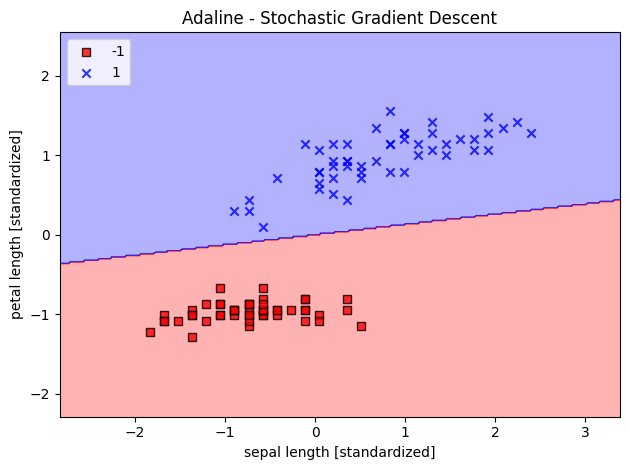

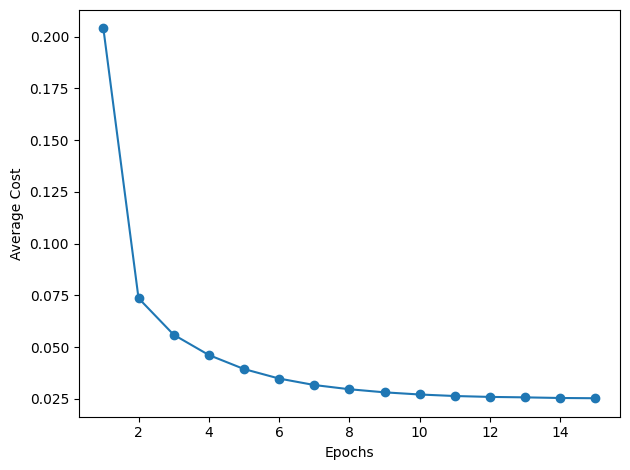

In [24]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

如上图所示，平均代价降低得非常快，在15次迭代后，最终的决策边界看起来与批量梯度下降的Adaline结果类似。如果要更新模型，例如，要实现流式数据的在线学习，可以对单个训练样本直接调用`partial_fit`方法，比如`ada_sgd.partial_fit(X_std[0, :], y［0)`。